In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from utils.data_acquisition import DataAcquisition
from utils.data_preparation import DataPreparation
from utils.feature_engineering import FeatureEngineering
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
df = DataAcquisition().get_data()

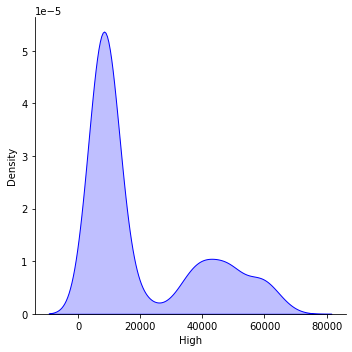

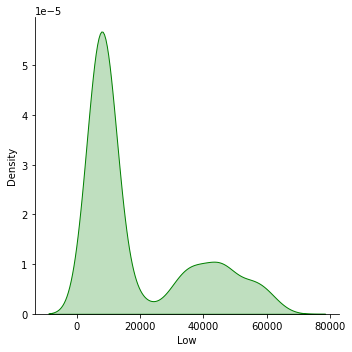

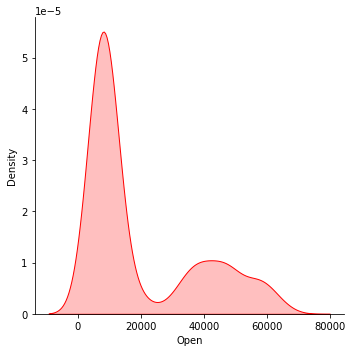

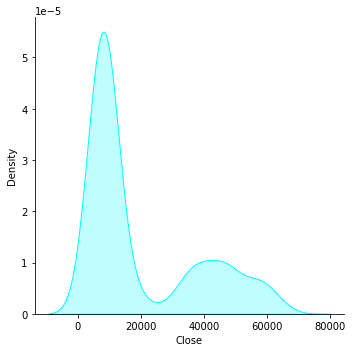

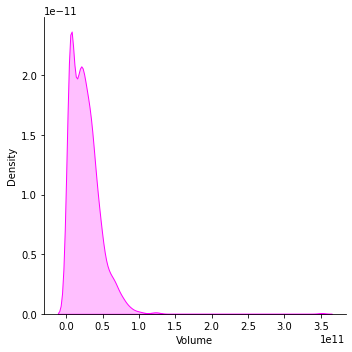

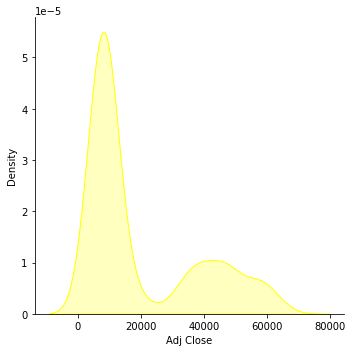

In [3]:
color = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
for cor,col  in enumerate(df.columns):
    sns.displot(df[col],kind='kde',fill=True,color=color[cor])
    plt.savefig(f'plots/{col}.png')

In [4]:
color = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
for cor,col in enumerate(df.columns):
    fig = px.histogram(df, x=col)
    fig.update_layout(title=f'Distribuição de {col}',
                        title_x=0.5,
                        xaxis_title=col,
                        yaxis_title='Frequência')
    #Remove background
    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
    fig.write_image(f'plots/{col}.png')
    fig.show()

In [5]:
red = df.loc[:,['Close','Adj Close']]

In [6]:
for col in red.columns:
    fig = px.histogram(df, x=col)
    fig.update_layout(title=f'Distribuição de {col}',
                        title_x=0.5,
                        xaxis_title=col,
                        yaxis_title='Frequência')
    #Remove background
    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
    fig.write_image(f'plots/data_prep/{col}.png')
    fig.show()

In [7]:
import plotly.express as px
df_fe = FeatureEngineering(df).pipeline_feat_eng()
df_fe['target'] = df['Close'].shift(-1) #Close_Tomorrow
df_corr = df_fe.corr()
df_corr = df_corr[df_corr.index=='target']
fig = px.imshow(df_corr)
#Rotate the labels
fig.update_xaxes(tickangle=-45)
fig.write_image(f'plots/feature_eng/corr.png')

In [8]:
def make_fig(y_true,y_pred,index,model_name):
    fig = make_subplots(specs=[[{'secondary_y': True}]])
    fig.add_trace(
    go.Scatter(
    x=index,
    y=y_true,
    name='BTC Real',
    mode='markers+lines',
    marker_color='#993399',
    ), secondary_y=False)

    
    fig.add_trace(
        go.Scatter(
        x=index,
        y=y_pred,
        name='BTC Previsto',
        mode='lines',
        marker_color='#fd5800',#'#ccff33',
    ), secondary_y=False)

   

    fig.update_yaxes(
        title_text="Preço",
        
            secondary_y=False, 
            gridcolor='#d3d3d3', 
            zerolinecolor='black')

    fig.update_xaxes(
        title_text="Data",
            gridcolor='#d3d3d3', 
            zerolinecolor='black')

    fig.update_layout(
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',
            margin=dict(l=100, r=0, b=50, t=50),
            height=350,
            title={'text': 'Comportamento do BTC de 2018 a 2022 com Shuffle', 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
            )
    return fig

make_fig(df['Close'].sample(frac=1),[],[x for x in range(len(df))],model_name='BTC')

In [9]:
# *** Gráfico de resíduos ***
import main
import numpy as np
result = main.realizar_predicao('XGBoost')
y_true = result['y_true']
y_pred = result['y_pred']
err = y_true - y_pred

fig = make_subplots(rows=1, cols=2, subplot_titles=('Resíduo', 'Predição vs Real'))

fig.add_trace(
    go.Scatter(
        x=y_true,
        y=err,
        mode='markers',
        name='Resíduo',
        marker_color='#fd5800',
    ), 
    row=1,
    col=1
)
fig.add_trace(
    go.Scatter(
        x=y_true,
        y=np.zeros_like(err),
        marker=dict(color='#000000'),
    ),
    row=1,
    col=1
)
fig.update_xaxes(title_text='Real', row=1, col=1)
fig.update_yaxes(title_text='Resíduo', row=1, col=1)

# fig.add_trace(
#     go.Scatter(
#         x=y_true,
#         y=y_pred,
#         mode='markers',
#         name='Predição'
#     ),
#     row=1,
#     col=2
# )
# fig.add_trace(
#     go.Scatter(
#         x=y_true,
#         y=y_true,
#         marker=dict(color='red'),
#     ),
#     row=1,
#     col=2
# )
# fig.update_xaxes(title_text='Real', row=1, col=2)
# fig.update_yaxes(title_text='Predição', row=1, col=2)
fig.update_layout(
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',
            margin=dict(l=100, r=0, b=50, t=50),
            height=350,
            )
fig.show()

           y_true        y_pred      index
0    60622.136719  58923.988281 2021-10-27
1    62227.964844  60227.519531 2021-10-28
2    61888.832031  62570.832031 2021-10-29
3    61318.957031  62540.144531 2021-10-30
4    61004.406250  61098.902344 2021-10-31
..            ...           ...        ...
150  46820.492188  43970.289062 2022-03-26
151  47128.003906  45615.859375 2022-03-27
152  47465.730469  45004.753906 2022-03-28
153  47062.664062  47614.375000 2022-03-29
154  47131.203125  47061.074219 2022-03-30

[155 rows x 3 columns]


In [10]:
import plotly.express as px
err = pd.DataFrame(err)
fig = px.box(err, x=0)
fig.update_layout(
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',
            margin=dict(l=100, r=0, b=50, t=50),
            height=350,
            )
fig.update_xaxes(title_text='Resíduo', row=1, col=1)        

In [11]:
import main
predicao = main.realizar_predicao('XGBoost')
main.make_fig(predicao)

           y_true        y_pred      index
0    60622.136719  58576.796875 2021-10-27
1    62227.964844  60390.589844 2021-10-28
2    61888.832031  62497.269531 2021-10-29
3    61318.957031  62521.312500 2021-10-30
4    61004.406250  61496.007812 2021-10-31
..            ...           ...        ...
150  46820.492188  43321.843750 2022-03-26
151  47128.003906  45996.472656 2022-03-27
152  47465.730469  45437.789062 2022-03-28
153  47062.664062  47595.121094 2022-03-29
154  47131.203125  46901.871094 2022-03-30

[155 rows x 3 columns]


In [12]:
mae, mse, percentual = main.calcula_metrica(predicao['y_true'],predicao['y_pred'],predicao['index'])
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'Percentual do erro: {percentual}')

MAE: 1773.0034778225806
MSE: 4817292.869987636
Percentual do erro: 6.195066875600176
